# Boundary Value Problem :

## Particle in a 1D Rigid Box :

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import numpy as np
sns.set_style('darkgrid')

### Step 1 : Plotting psi_L as a function of E

Text(0, 0.5, 'psi_L')

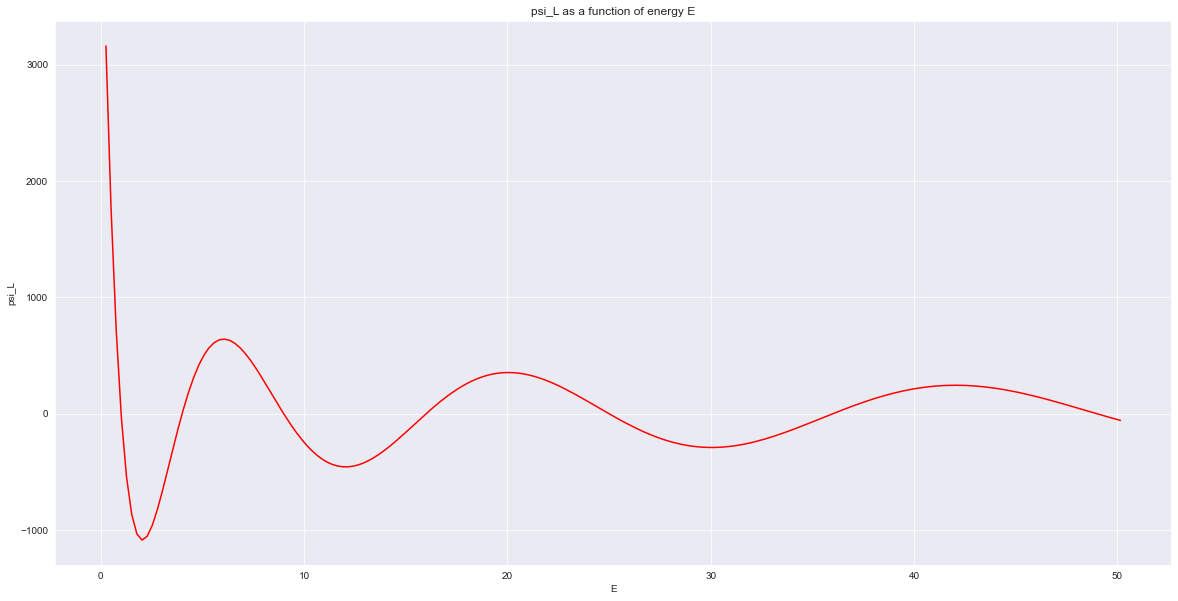

In [3]:
L = 5.0   # length of the box
h = 0.001   # step size for x
n = int(L/h)   # no. of step for x

# Energy Eigen Values Stuff
Ei = 0.1
Ef = 20.0
dE = 0.1
nE = int((Ef-Ei)/dE)
E = Ei

# define the lists
e = []
siL = []

for _ in range(nE):
    
    x = 0
    si = 0   # boundary conditions
    si1 = 1.0  # arbitrarily chosen
    
    for _ in range(n):
        
        si2 = (2.0 - h**2*E)*si1 - si # three point formula
        si = si1
        si1 = si2
        x = x+h
    
    e.append(E*L**2/np.pi**2)
    siL.append(si) # now we have values of psi at L at different E 
    E = E+dE
    
#print(si,E)
plt.plot(e, siL, color = "red")
plt.title("psi_L as a function of energy E")
plt.rcParams["figure.figsize"] = (20, 10)
plt.xlabel("E")
plt.ylabel("psi_L")

In the above figure we can see that, at e = 1, 4, 9, 16, 25 etc, the value of psi_L vanishes. It is simply because, they are the $n^2$ terms which appear in eigenvalue formula. 

### Step 2 : Getting the Eigen Values of the Problem

In [ ]:
def siL(E):
    
    si = 0   # boundary conditions
    si1 = 1.0  # arbitrarily chosen
    
    for _ in range(n):
        
        si2 = (2.0 - h**2*E)*si1 - si
        si = si1
        si1 = si2
    
    return si


E1 = float(input("Input the initial guess for energy eigenvalue:"))
E2 = E1 + 0.1

for _ in range(1000):
    
    siL1 = siL(E1)
    siL2 = siL(E2)

    E3 = (siL2*E1 - siL1*E2)/(siL2 - siL1)   # secant method

    if abs(E3-E2) <= 1.0e-4:
        print("The Eigenvalue is:", E3)
        break
        
    else:
        E1 = E2
        E2 = E3

By running the above program we get the first three eigen values as:

Input the initial guess for energy eigenvalue:0.1 ;
The Eigenvalue is: E1 = 0.3947837899583992  
    
Input the initial guess for energy eigenvalue:1.5 ;
The Eigenvalue is: E2 = 1.579136498917328   
    
Input the initial guess for energy eigenvalue:3.4 ;
The Eigenvalue is: E3 = 3.5530565289472684   

### Step 3 : Plotting the Eigen Functions 

In [8]:
# first let's normalize the wave function

def Anorm(E):
    
    si = 0   # boundary conditions
    si1 = 1.0  # arbitrarily chosen
    sum = 0
    
    for _ in range(n):
        
        sum = sum + si**2
        si2 = (2.0 - h**2*E)*si1 - si
        si = si1
        si1 = si2
    
    return 1/np.sqrt(sum*h)


# define the lists

psi1 = []
x1 = []


# Now let's plot

x = 0
si = 0
si1 = 1.0
E = 0.3947837899583992  
A = Anorm(E)

for _ in range(n):
        
    si2 = (2.0 - h**2*E)*si1 - si
    si = si1
    si1 = si2
    x = x+h
    
    x1.append(x)
    psi1.append(si*A)

In [9]:
# define the lists

psi2 = []
x2 = []


# Now let's plot

x = 0
si = 0
si1 = 1.0
E = 1.579136498917328  
A = Anorm(E)

for _ in range(n):
        
    si2 = (2.0 - h**2*E)*si1 - si
    si = si1
    si1 = si2
    x = x+h
    
    x2.append(x)
    psi2.append(si*A)

In [10]:
# define the lists

psi3 = []
x3 = []


# Now let's plot

x = 0
si = 0
si1 = 1.0
E = 3.5530565289472684  
A = Anorm(E)

for _ in range(n):
        
    si2 = (2.0 - h**2*E)*si1 - si
    si = si1
    si1 = si2
    x = x+h
    
    x3.append(x)
    psi3.append(si*A)

Text(0, 0.5, 'psi(x)_3')

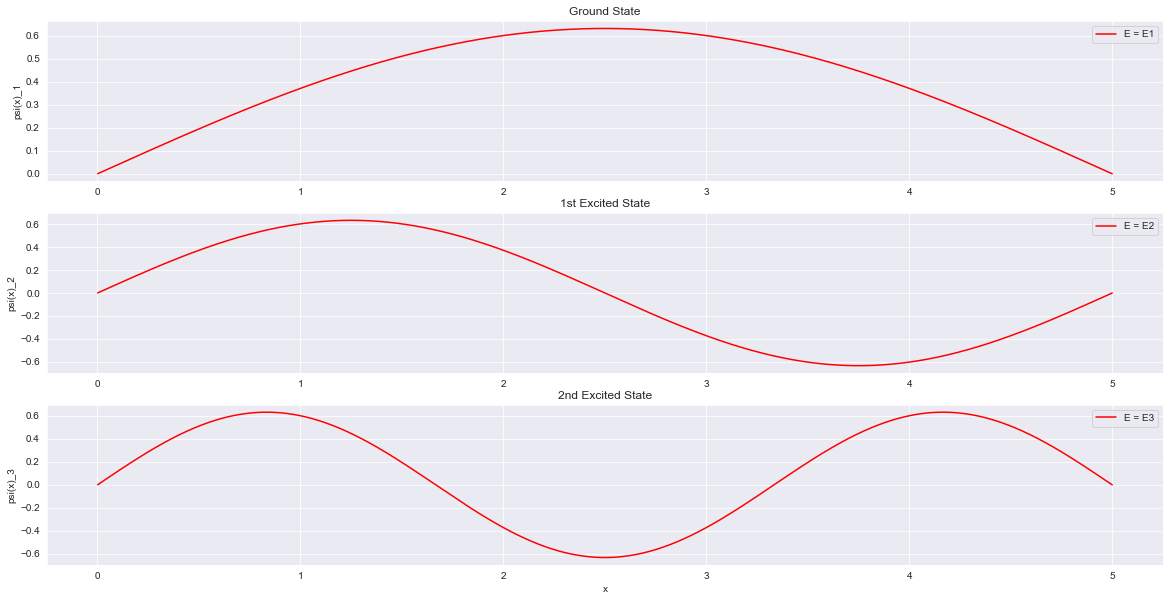

In [11]:
plt.subplot(311)
plt.title("Ground State")
plt.plot(x1, psi1, label = "E = E1", color = "red")    
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.ylabel("psi(x)_1")

plt.subplot(312)
plt.title("1st Excited State")
plt.plot(x2, psi2, label = "E = E2", color = "red" )    
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.ylabel("psi(x)_2")

plt.subplot(313)
plt.title("2nd Excited State")
plt.plot(x3, psi3, label = "E = E3",color = "red" )    
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.xlabel("x")
plt.ylabel("psi(x)_3")